# Predicting chances of heart disease using SVM

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
# Loading data
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heartdisease']
clivelandData = pd.read_csv('cleveland.csv', names = features)
hungarianData = pd.read_csv('hungary.csv', names = features)
switzerlandData = pd.read_csv('switzerland.csv', names = features)

In [3]:
datatemp = [clivelandData, hungarianData, switzerlandData]
data = pd.concat(datatemp)

In [4]:
data = data.drop(["ca", "slope", "thal"],axis=1)
data = data.replace('?', np.nan)

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,heartdisease
0,63.0,1.0,1.0,145,233,1,2,150,0,2.3,0
1,67.0,1.0,4.0,160,286,0,2,108,1,1.5,2
2,67.0,1.0,4.0,120,229,0,2,129,1,2.6,1
3,37.0,1.0,3.0,130,250,0,0,187,0,3.5,0
4,41.0,0.0,2.0,130,204,0,2,172,0,1.4,0


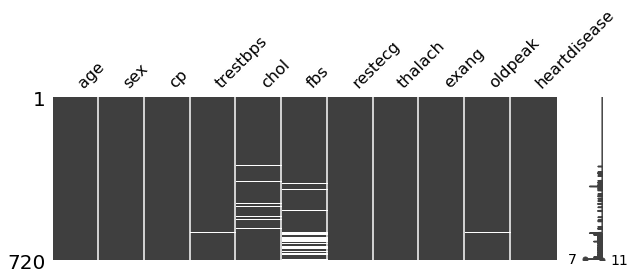

In [10]:
# Missing data detection
msno.matrix(data,figsize=(10,3))

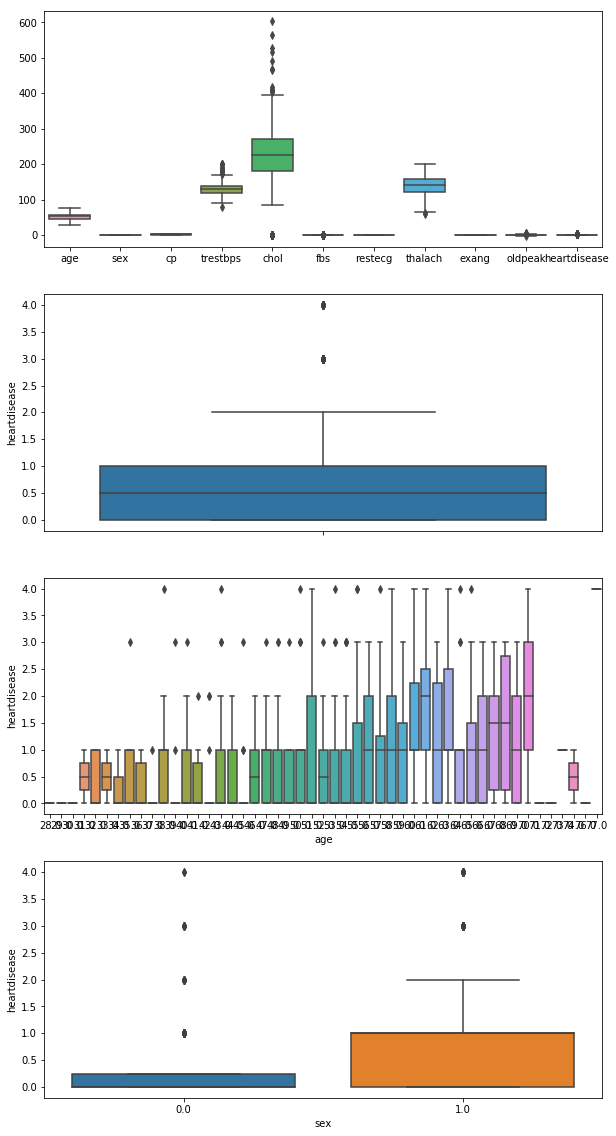

In [11]:
# Outliners detection and class imbalance
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10, 20)
sn.boxplot(data=data,orient="v",ax=axes[0])
sn.boxplot(data=data,y="heartdisease",orient="v",ax=axes[1])
sn.boxplot(data=data,y="heartdisease",x="age",orient="v",ax=axes[2])
sn.boxplot(data=data,y="heartdisease",x="sex",orient="v",ax=axes[3])


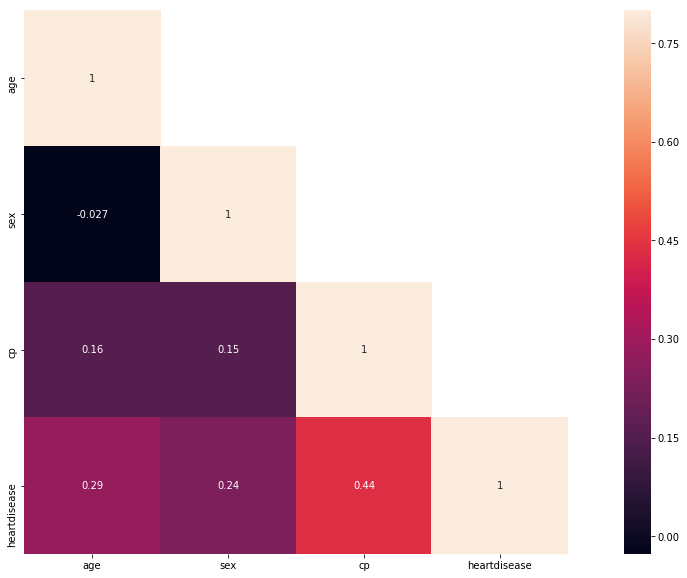

In [12]:
# Correlation analasys
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [13]:
from sklearn.preprocessing import normalize, Imputer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [14]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imputedData = imp.fit_transform(data)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 122
Data columns (total 11 columns):
age             720 non-null float64
sex             720 non-null float64
cp              720 non-null float64
trestbps        717 non-null object
chol            697 non-null object
fbs             637 non-null object
restecg         718 non-null object
thalach         718 non-null object
exang           718 non-null object
oldpeak         714 non-null object
heartdisease    720 non-null int64
dtypes: float64(3), int64(1), object(7)
memory usage: 87.5+ KB


In [16]:
# Creating Test and Train data
X_train, X_test, y_train, y_test = train_test_split(imputedData[:, :-1], imputedData[:, -1], test_size=0.3, random_state=42)

In [17]:
# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
# Build and train the Model
classifier = svm.SVC(kernel='rbf')
classifier.fit(X_train, y_train)
preds = classifier.predict(X_test)


In [19]:
# Accuracy of predictions
accuracy_score(y_test, preds)

0.6527777777777778